In [4]:
import pandas as pd
from sqlite3 import connect
import matplotlib.pyplot as plt

In [5]:
conn = connect(r'C:\Users\пк\school21\project11\data\checking-logs.sqlite')

In [6]:
df1 = pd.io.sql.read_sql('''
SELECT datetime as view
FROM pageviews
WHERE uid like 'user_%'
''',
                conn,
                parse_dates=['view'])
df1    #Анализируйте только пользователей, а не администраторов

,view
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [7]:
df2 = pd.io.sql.read_sql('''
SELECT timestamp as first_commit
FROM checker
WHERE status = 'ready'
AND uid LIKE "user_%"
''',
                conn,
                parse_dates=['first_commit'])
df2   #Используйте фильтр status = 'ready' для коммитов

,first_commit
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104
...,...
1681,2020-05-21 20:01:48.959966
1682,2020-05-21 20:18:54.487900
1683,2020-05-21 20:19:06.872761
1684,2020-05-21 20:22:41.877806


In [8]:
df1['date'] = df1['view'].dt.date
df2['date'] = df2['first_commit'].dt.date
df1['views'] = 1
df2['commits'] = 1
df1.head()    #Анализируйте только те даты, когда были зафиксированы и просмотры, и коммиты

,view,date,views
0,2020-04-17 22:46:26.785035,2020-04-17,1
1,2020-04-18 10:53:52.623447,2020-04-18,1
2,2020-04-18 10:56:55.833899,2020-04-18,1
3,2020-04-18 10:57:37.331258,2020-04-18,1
4,2020-04-18 12:05:48.200144,2020-04-18,1


In [9]:
df1 = df1.drop(columns='view').groupby(by='date', dropna = False).count()
df1.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [10]:
df2 = df2.drop(columns='first_commit').groupby(by='date', dropna = False).count()
df2.head()

,commits
date,
2020-04-17,13
2020-04-18,39
2020-04-19,18
2020-04-20,16
2020-04-21,13


In [11]:
from pandas.core.reshape.merge import merge
df3 = merge(df1, df2, how='inner', left_index=True, right_index=True)
df3.head()

,views,commits
date,,
2020-04-17,1,13
2020-04-18,23,39
2020-04-19,15,18
2020-04-21,3,13
2020-04-22,1,16


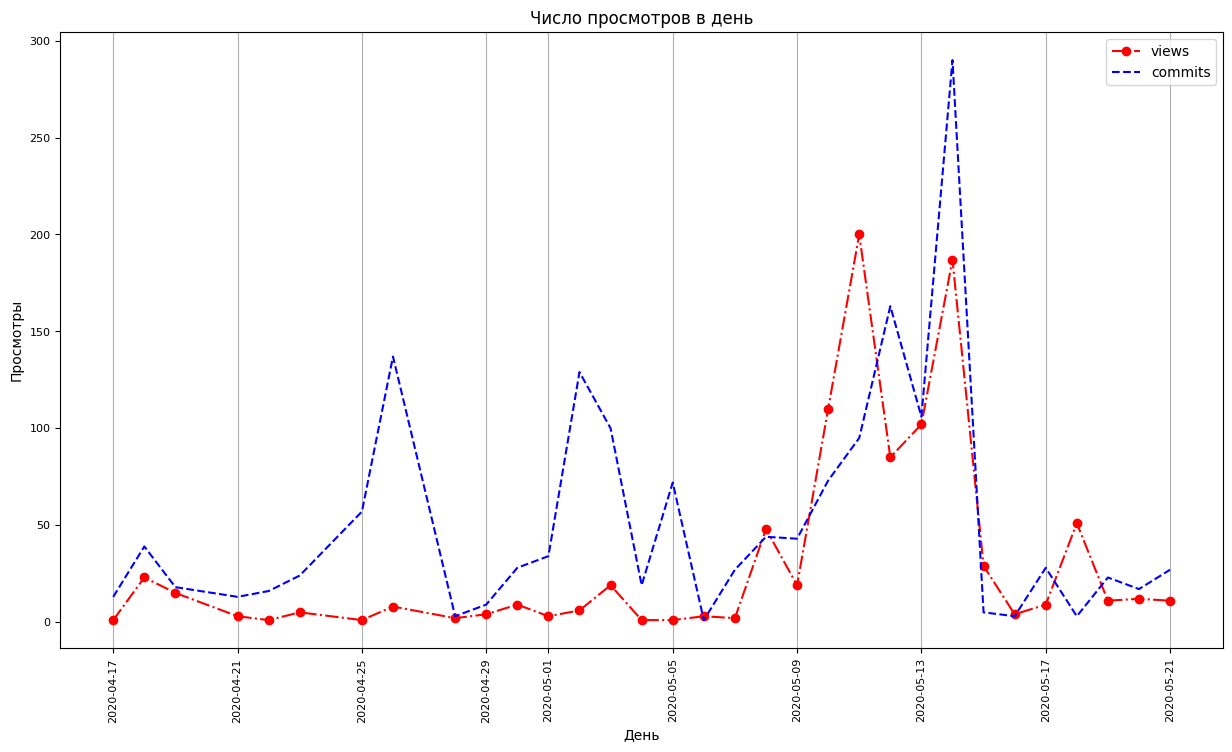

In [12]:
df3.plot(
         y = ['views', 'commits'],
         color = ['red', 'blue'],
         style = ["o-.", "--"],
         figsize=(15, 8), rot=90, fontsize=8,
         title="Число просмотров в день",
         xlabel='День', ylabel='Просмотры'
)
plt.grid(axis='x')
plt.show()  

«Сколько раз количество просмотров превышало 150?»

ответ:2

In [14]:
conn.close()